In [8]:
 #1. Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.model_selection import TimeSeriesSplit, cross_val_score
import joblib

In [9]:
# 2. Load Processed Dataset
file_path = r"C:\Users\F8eee\Downloads\Trafficproject_processed_unique.csv"
df = pd.read_csv(file_path)
print(" Data Loaded")
print(df.head())

 Data Loaded
   Junction             DateTime  Vehicles     TempC      Rain  IsEvent  \
0         1  2015-11-01 08:00:00 -0.568261 -0.880972 -0.004559        0   
1         1  2015-11-01 09:00:00 -0.520068 -0.880972 -0.004559        1   
2         1  2015-11-01 10:00:00 -0.375489 -1.467077 -0.004559        1   
3         1  2015-11-01 11:00:00 -0.279103 -0.880972 -0.004559        1   
4         1  2015-11-01 12:00:00 -0.327296  0.877343 -0.004559        1   

   IsWeekend  Hour  DayOfWeek  IsMorning  IsPeakHour    Lag_2h    Lag_4h  \
0          0     8          6          1           1 -0.664648 -0.664648   
1          0     9          6          1           1 -0.712841 -0.809227   
2          1    10          6          1           1 -0.568261 -0.664648   
3          0    11          6          1           0 -0.520068 -0.712841   
4          1    12          6          0           0 -0.375489 -0.568261   

     Lag_8h  
0 -0.375489  
1 -0.471875  
2 -0.616454  
3 -0.761034  
4 -0.6646

In [10]:
# 3. Train-Test Split (Time-Based)
train_size = int(len(df) * 0.8)
train, test = df[:train_size], df[train_size:]

X_train = train.drop(['Vehicles','DateTime'], axis=1)
y_train = train['Vehicles']
X_test = test.drop(['Vehicles','DateTime'], axis=1)
y_test = test['Vehicles']

print("Train shape:", X_train.shape, ", Test shape:", X_test.shape)

Train shape: (38470, 12) , Test shape: (9618, 12)


In [11]:
# 4. Train Random Forest Model (changed estimator count)
rf = RandomForestRegressor(n_estimators=150, random_state=99)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)

mae_rf = mean_absolute_error(y_test, y_pred_rf)
rmse_rf = np.sqrt(mean_squared_error(y_test, y_pred_rf))
r2_rf = r2_score(y_test, y_pred_rf)

print(" Random Forest Performance (Updated)")
print(f"MAE: {mae_rf:.3f}")
print(f"RMSE: {rmse_rf:.3f}")
print(f"R²: {r2_rf:.3f}")

 Random Forest Performance (Updated)
MAE: 0.150
RMSE: 0.292
R²: 0.632


In [12]:
# 5. Train Gradient Boosting Model (changed hyperparams)
gb = GradientBoostingRegressor(n_estimators=180, learning_rate=0.08, random_state=99)
gb.fit(X_train, y_train)
y_pred_gb = gb.predict(X_test)

mae_gb = mean_absolute_error(y_test, y_pred_gb)
rmse_gb = np.sqrt(mean_squared_error(y_test, y_pred_gb))
r2_gb = r2_score(y_test, y_pred_gb)

print("Gradient Boosting Performance (Updated)")
print(f"MAE: {mae_gb:.3f}")
print(f"RMSE: {rmse_gb:.3f}")
print(f"R²: {r2_gb:.3f}")

Gradient Boosting Performance (Updated)
MAE: 0.144
RMSE: 0.280
R²: 0.660


In [13]:
# 6. Cross-Validation (TimeSeriesSplit)
tscv = TimeSeriesSplit(n_splits=4)
rf_cv = RandomForestRegressor(n_estimators=150, random_state=99)

cv_scores = cross_val_score(rf_cv, X_train, y_train, cv=tscv, scoring='neg_root_mean_squared_error')
print("Cross-validation RMSE scores:", -cv_scores)
print("Average CV RMSE:", -cv_scores.mean())

Cross-validation RMSE scores: [0.71377677 0.15472941 0.20356131 0.33333248]
Average CV RMSE: 0.35134999223630564


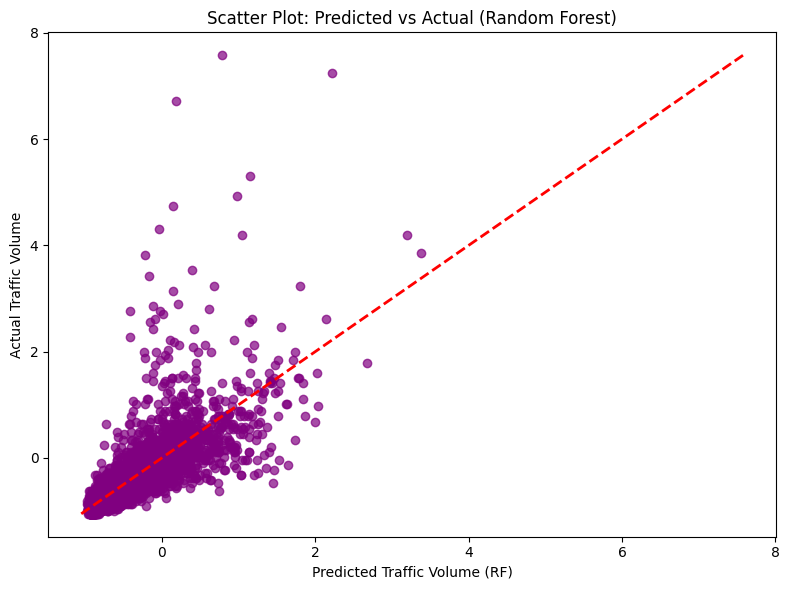

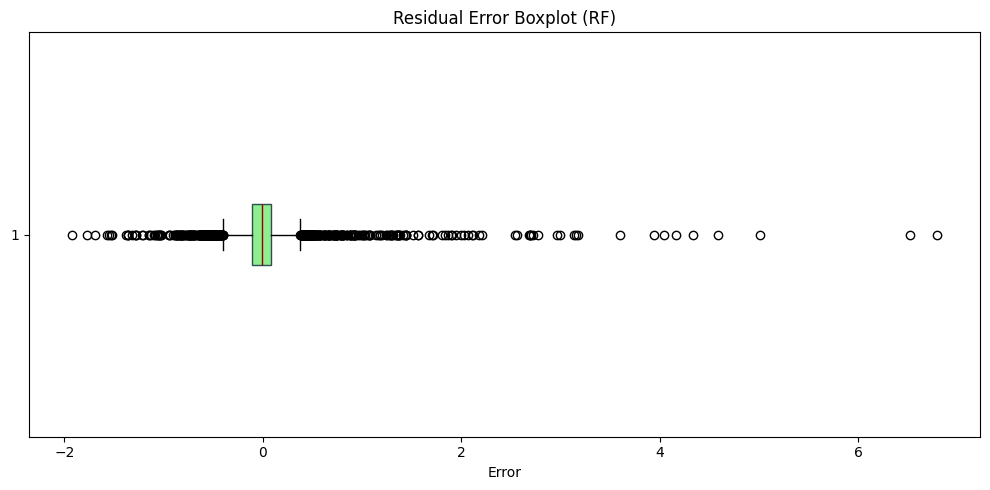

In [14]:
# 7. Visualizations (use a new graph: Scatter plot of Predicted vs Actual)
plt.figure(figsize=(8,6))
plt.scatter(y_pred_rf, y_test, alpha=0.7, color='purple')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel("Predicted Traffic Volume (RF)")
plt.ylabel("Actual Traffic Volume")
plt.title("Scatter Plot: Predicted vs Actual (Random Forest)")
plt.tight_layout()
plt.show()

# Residuals (update style)
residuals = y_test.values - y_pred_rf
plt.figure(figsize=(10,5))
plt.boxplot(residuals, vert=False, patch_artist=True,
            boxprops=dict(facecolor='lightgreen', color='darkslategrey'),
            medianprops=dict(color='darkred'))
plt.title("Residual Error Boxplot (RF)")
plt.xlabel("Error")
plt.tight_layout()
plt.show()

In [15]:
# 8. Save Best Model
joblib.dump(rf, "traffic_rf_model_unique.pkl")
print("✅ Model saved as traffic_rf_model_unique.pkl")


✅ Model saved as traffic_rf_model_unique.pkl
